In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Muograms

In [2]:
def get_data(path):
    data_list = sorted(os.listdir(path)) # Data names list
    data = np.array([np.loadtxt(path+'/'+data, comments = '#') for data in data_list]) # Read data
    return data, data_list

In [6]:
path = '/home/kevin/Documentos/muograms2'
data, data_list = get_data(path)
print(data.shape)

(33, 100, 100)


In [7]:
cenit = np.linspace(-8, 20,100)
azimut = np.linspace(-50,50,100)

In [8]:
def plot_muograms(muograms,cenit,azimut,data_list,nrows,ncols,save=False,axis=True):
    plt.figure(figsize=(ncols*8,nrows*7))
    plt.rcParams.update({'font.size': 12})
    for i in range(len(muograms)):
        plt.subplot(nrows,ncols,i+1)
        plt.imshow(muograms[i])
        plt.xticks(range(muograms.shape[2])[::20],np.round(np.unique(azimut)[::20],2))
        plt.xlabel(r'$\Theta_x$ [degree]')
        plt.yticks(range(muograms.shape[1])[::20],np.round(np.unique(cenit)[::20],2))
        plt.ylabel(r'$\Theta_y$ [degree]')
        if not axis:
            plt.axis('off')
        plt.colorbar(shrink=0.9,label='D [m]')
        plt.title(data_list[i])
    if save:
        plt.savefig('CMmuograms.svg',format='svg')

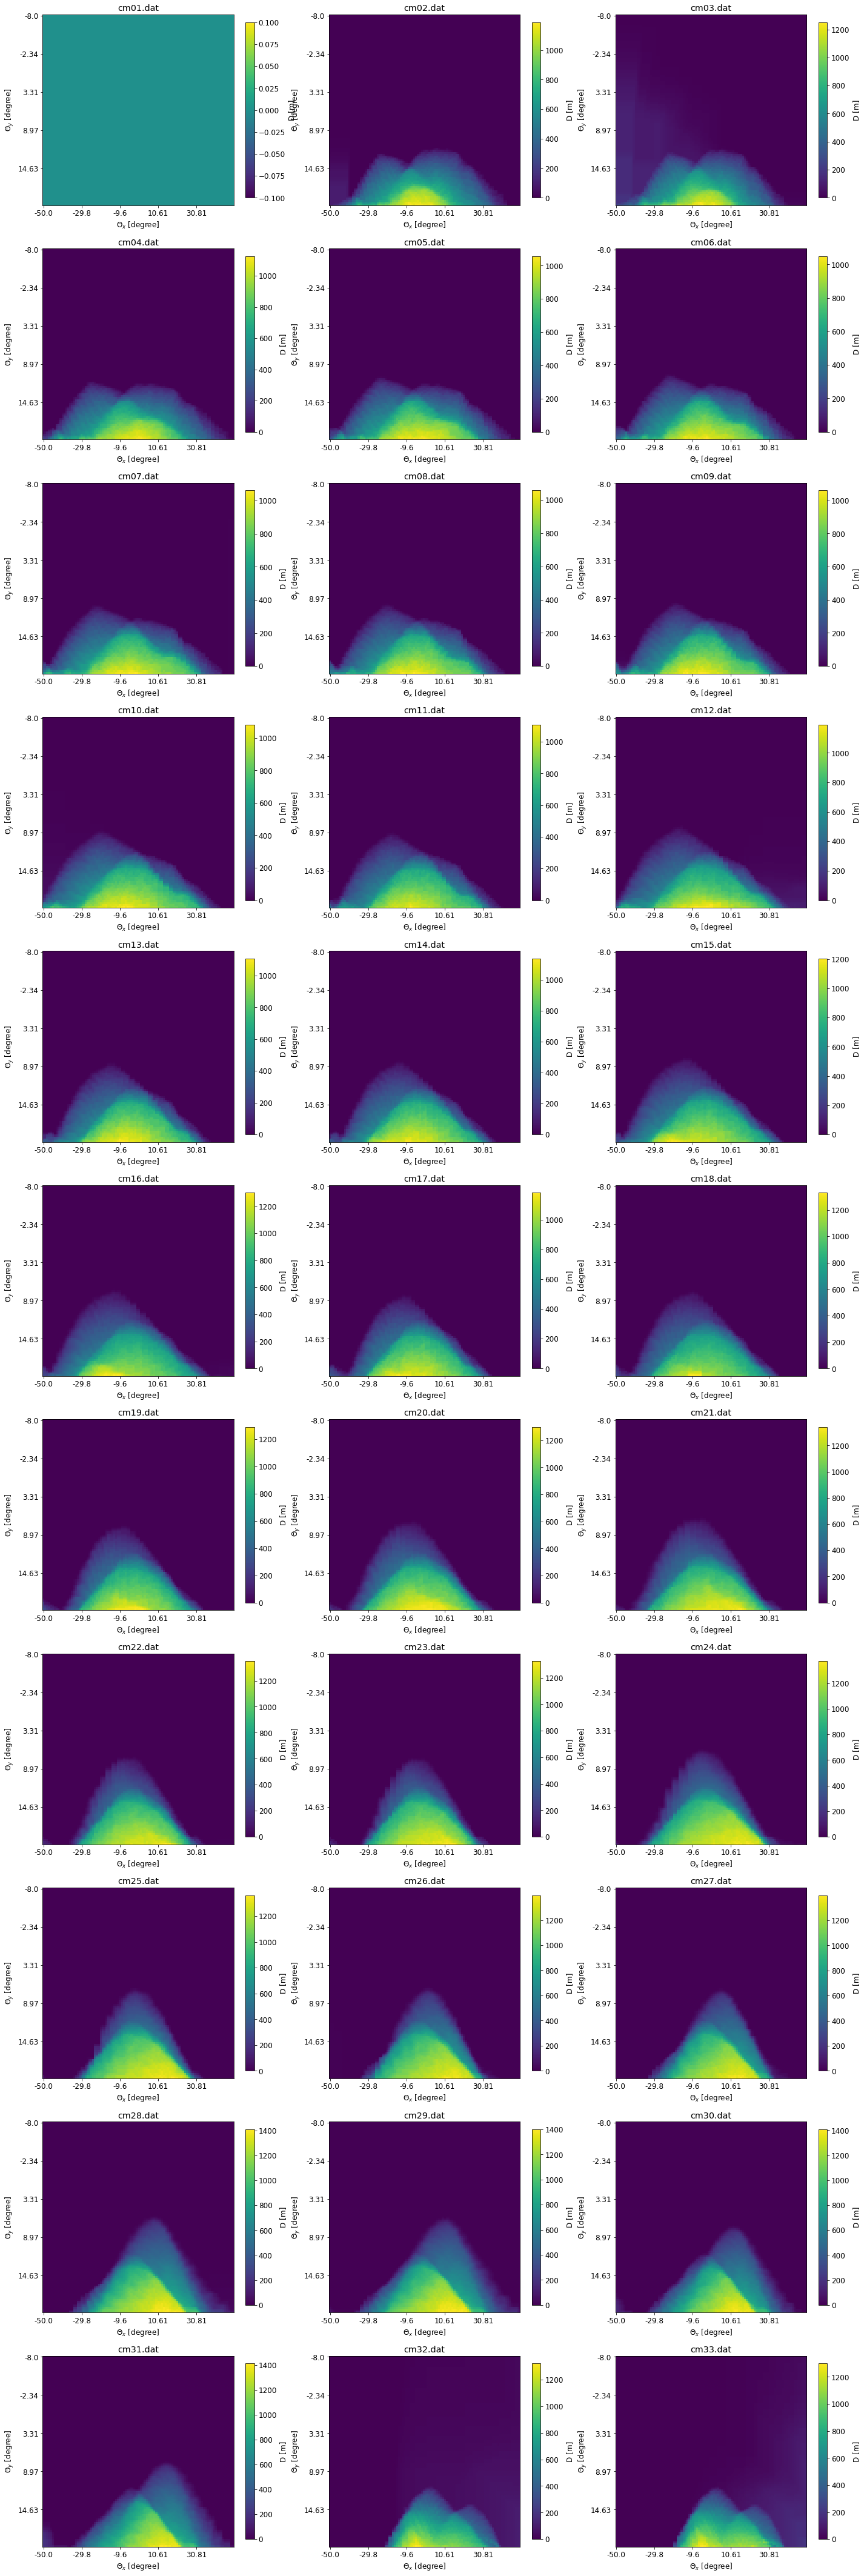

In [9]:
plot_muograms(data,cenit,azimut,data_list,11,3)

## Coordinates

In [10]:
def get_coords(path):
    return np.loadtxt(path)

In [17]:
points = get_coords('/home/kevin/coordinates4.dat')
print(points.shape)

(33, 2)


In [12]:
def plot_detector_coords(coords,data_names,show_names=True,save=False,axis=True,heightmap=False):
    if heightmap:
        axis = False
        coords[:,0] = (coords[:,0] - 4.47) / (4.5 - 4.47)*100
        coords[:,1] = (coords[:,1] - (-75.37)) / ((-75.4) - (-75.37))*100
    colors = np.ones(len(coords))+1
    colors[0] = 0 # Reference point
    colors = colors.astype('int32')
    colormap = np.array(['r','g','b'])
    plt.figure(figsize=(10,10))
    plt.scatter(coords[:,1],coords[:,0],c=colormap[colors])
    if show_names:
        for i in range(coords.shape[0]-1):
            plt.text(coords[i+1,1],coords[i+1,0],data_names[i],fontsize=8)
    plt.xlabel('long')
    plt.ylabel('lat')
    plt.title('Observation point positions')
    if axis:
        plt.axis([-75.37, -75.4, 4.5, 4.470])
    if save:
        plt.savefig('CMcoords.svg',format='svg')

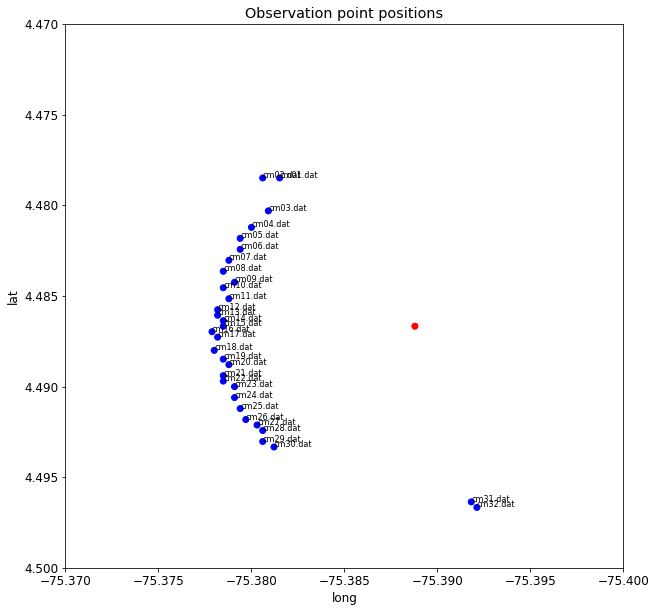

In [13]:
plot_detector_coords(points,data_list)

<Figure size 720x720 with 0 Axes>

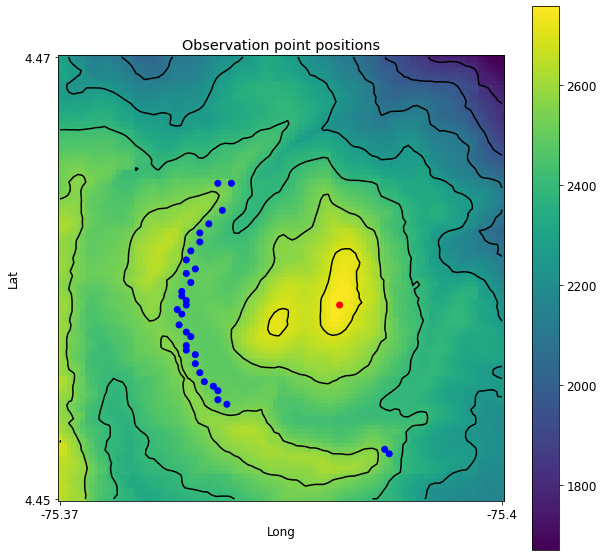

In [14]:
heightmap = np.loadtxt('/home/kevin/heightmap.dat')
#heightmap = (heightmap - np.min(heightmap)) / (np.max(heightmap) - np.min(heightmap)) # Normalization
plt.figure(figsize=(10,10))
plot_detector_coords(points,data_list,show_names=False,heightmap=True)
plt.imshow(heightmap)
plt.yticks([0,100-1],np.linspace(4.47,4.45,2))
plt.ylabel('Lat')
plt.xticks([0,100-1],np.linspace(-75.37,-75.4,2))
plt.xlabel('Long')
plt.colorbar()
plt.contour(heightmap,colors='k')
#plt.savefig('heightmap3.svg',format='svg')

### angles

In [15]:
def get_angles(points):
    return np.array([np.arctan2((point - points[0])[0],(point - points[0])[1])+(3*np.pi/2) for point in points[1:]])

In [19]:
angles = get_angles(points)
print(angles.shape,angles*180/np.pi)

(32,) [221.63354368 225.         231.07244794 238.17253557 242.70040448
 245.69542295 250.01686128 253.61042354 255.96371482 258.36632364
 261.3843603  265.10091214 266.72951515 268.31531732 270.
 271.59113881 273.27048485 277.0457509  280.00797028 281.97612081
 284.82646621 286.38952528 288.97038964 292.10942774 295.82096806
 299.53875523 302.73519556 305.1341601  307.87494971 311.34773971
 377.35400781 378.43493163]


## Reconstruction

In [20]:
import tomopy
rec = tomopy.recon(data[1:],angles,algorithm='fbp')

In [21]:
rec.shape

(100, 100, 100)

In [22]:
recZ = np.sum(rec,axis=0)
recZ_norm = (recZ - np.min(recZ)) / (np.max(recZ) - np.min(recZ))

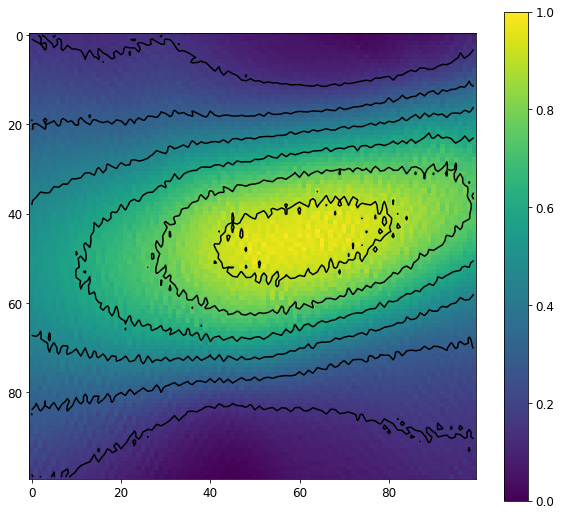

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(recZ_norm)
#plt.yticks([0,100-1],np.linspace(4.478,4.492,2))
#plt.ylabel('Lat')
#plt.xticks([0,100-1],np.linspace(-75.385,-75.393,2))
#plt.xlabel('Long')
plt.colorbar(shrink=0.9)
plt.contour(recZ_norm,colors='k')
#plt.savefig('recCM.svg',format='svg')